In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


# Descriptive statistics on speed

In [4]:
def Cycling_summary(dataframe):
    print("mean speed", dataframe['speed'].mean())
    print("median speed", dataframe['speed'].median())
    print("st.dev speed", dataframe['speed'].std())
    print("min speed", dataframe['speed'].min())
    print("max speed", dataframe['speed'].max())
    print("distance", dataframe['distance'].sum())
    print("\n")

In [5]:
#Showing the results of each datasets statistics
print('Road race 2016:')
Cycling_summary(rr_2016)
print('Time trial 2016:')
Cycling_summary(tt_2016)
print('Road race 2019:')
Cycling_summary(rr_2019)
print('Time trial 2019:')
Cycling_summary(tt_2019)

Road race 2016:
mean speed 34.93308475482947
median speed 33.307339470155554
st.dev speed 10.738676724095608
min speed 0.0
max speed 92.74903649913952
distance 49.04858574628638


Time trial 2016:
mean speed 33.52996304869014
median speed 32.8400758641767
st.dev speed 11.519680824236476
min speed 0.0
max speed 162.50576377606754
distance 24.80288703130808


Road race 2019:
mean speed 33.87986137188044
median speed 33.04135976384563
st.dev speed 8.853502991978914
min speed 0.0
max speed 70.37046868335639
distance 51.78913253596059


Time trial 2019:
mean speed 33.05782378815691
median speed 33.22010754422876
st.dev speed 9.773521681835703
min speed 0.0
max speed 63.300734121945005
distance 24.38014504376575




# Interpretation
The average speed across all 4 races are similar around 33-34 km/h and the standard deviation is quite large with 8-11 km/h indicating a high amount of spread across the data. The distance for the races and trials are different, the races are double the distance travelled than the time trials.

# Charts to compare speeds

<AxesSubplot:title={'center':'Time trial 2019'}>

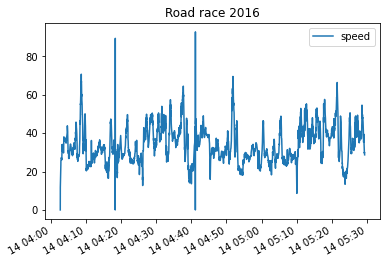

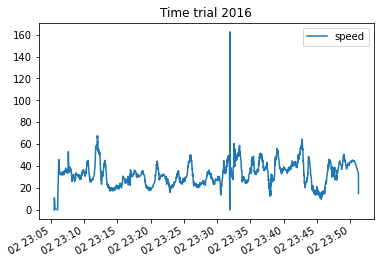

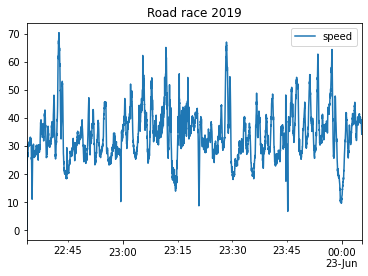

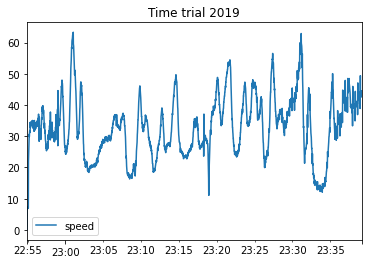

In [35]:
#Plotting the speed against time
rr_2016.plot( y = "speed", title = 'Road race 2016')
tt_2016.plot(y = "speed", title = 'Time trial 2016')
rr_2019.plot(y = "speed", title = 'Road race 2019')
tt_2019.plot(y = "speed", title = 'Time trial 2019')

# Interpretation
Time trial 2016 seems to have a outlier as the max speed spikes up to over 100km/h then spikes down too 0km/h. Similar in road race 2016 where the speed spikes up over 80km/h then spikes down to 0. This seems very unlikely meaning that there could be a malfunction with the machine recording the data. thus, removing the outliers seems necessary to ensure accurate analysis.

# Data cleaning

In [7]:
clean_rr_2016 = rr_2016.drop(rr_2016.index[(rr_2016['timedelta'].notnull()) & ((rr_2016['speed'] > 80) | (rr_2016['speed'] == 0))])

In [8]:
clean_tt_2016 = tt_2016.drop(tt_2016.index[(tt_2016['timedelta'].notnull()) & ((tt_2016['speed'] > 80) | (tt_2016['speed'] == 0))])

In [9]:
clean_rr_2019 = rr_2019.drop(rr_2019.index[(rr_2019['timedelta'].notnull()) & ((rr_2019['speed'] > 80) | (rr_2019['speed'] == 0))])

In [10]:
clean_tt_2019 = tt_2019.drop(tt_2019.index[(tt_2019['timedelta'].notnull()) & ((tt_2019['speed'] > 80) | (tt_2019['speed'] == 0))])

# Descriptive  statistics on speed with cleaned data

In [11]:
print('Road race 2016:')
Cycling_summary(clean_rr_2016)
print('Time trial 2016:')
Cycling_summary(clean_tt_2016)
print('Road race 2019:')
Cycling_summary(clean_rr_2019)
print('Time trial 2019:')
Cycling_summary(clean_tt_2019)

Road race 2016:
mean speed 34.91803465398332
median speed 33.307339470155554
st.dev speed 10.600791539800214
min speed 0.0
max speed 70.70948664334745
distance 48.99799032317423


Time trial 2016:
mean speed 33.46794496052985
median speed 32.8400758641767
st.dev speed 11.014760056120295
min speed 0.0
max speed 67.86201094032148
distance 24.757746541370288


Road race 2019:
mean speed 33.87986137188044
median speed 33.04135976384563
st.dev speed 8.853502991978914
min speed 0.0
max speed 70.37046868335639
distance 51.78913253596059


Time trial 2019:
mean speed 33.05782378815691
median speed 33.22010754422876
st.dev speed 9.773521681835703
min speed 0.0
max speed 63.300734121945005
distance 24.38014504376575




# Interpretation
The data for road race 2016 and time trial 2016 improved after the outliers were removed, with the standard deviation lowering compared to the normal data given.

# Charts to compare speeds cleaned data

<AxesSubplot:title={'center':'Time trial 2019'}>

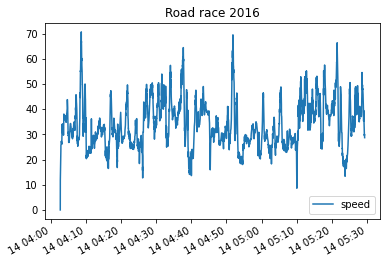

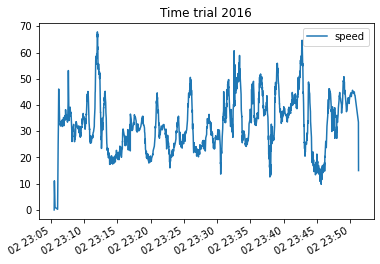

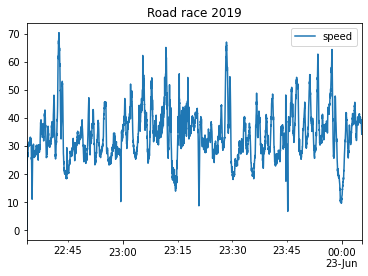

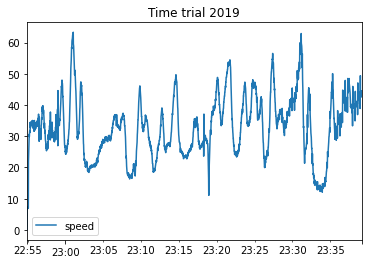

In [12]:

clean_rr_2016.plot( y = "speed", title = 'Road race 2016')
clean_tt_2016.plot(y = "speed", title = 'Time trial 2016')
clean_rr_2019.plot(y = "speed", title = 'Road race 2019')
clean_tt_2019.plot(y = "speed", title = 'Time trial 2019')

# Interpretation
The line graph plots speed against time, the graph illustrates a more realistic cycle speed and the spikes in data points are not as evident in the data cleaned line plots. Road races and time trials seems to have very similar speeds the line graphs are very similar and the speeds in the statistics are also similar.\
\
Time trial 2016 is only slightly faster than Time trial 2019 as the average speed for Time trial 2016 is 33.46km/h and Time trial 2019 is 33.05km/h.


# Road race 2016

In [65]:
clean_rr_2016.groupby(['elevation_gain'])['speed'].mean()

elevation_gain
-1.6    68.583640
-1.4    65.127031
-1.4    64.712998
-1.2    60.310990
-1.2    60.538774
-1.0    58.132931
-0.8    50.089684
-0.8    50.791420
-0.8    47.139943
-0.6    45.713913
-0.6    46.494535
-0.6    45.586367
-0.4    42.167545
-0.4    42.302897
-0.4    42.634869
 0.0    34.425233
 0.4    26.623246
 0.4    25.765155
 0.4    27.433744
 0.6    28.855236
 0.6    26.151386
 0.6    27.096338
 0.8    25.304046
 0.8    46.815945
 0.8    26.841144
 1.0    27.619697
 1.2    21.553503
Name: speed, dtype: float64

# Time trial 2016

In [62]:
clean_tt_2016.groupby(['elevation_gain'])['speed'].mean()

elevation_gain
-7.4    33.465472
-1.6    67.862011
-1.6    61.211362
-1.4    54.665243
-1.4    58.303224
-1.2    52.482455
-1.2    56.518850
-1.2    54.724857
-1.0    55.763761
-0.8    47.351091
-0.8    46.081421
-0.8    47.526316
-0.6    43.338769
-0.6    43.682123
-0.6    44.137403
-0.4    41.457776
-0.4    41.463459
-0.4    42.907831
-0.2    29.741019
 0.0    34.040761
 0.2    29.271704
 0.4    25.583544
 0.4    22.890861
 0.4    24.709026
 0.6    24.404992
 0.6    22.565462
 0.6    25.437296
 0.8    28.594479
 0.8    26.083414
 0.8    26.254268
 1.0    31.701982
 1.2    32.032161
 2.4    26.967696
Name: speed, dtype: float64

# Road race 2019

In [61]:
clean_rr_2019.groupby(['elevation_gain'])['speed'].mean()

elevation_gain
-2.0    65.961951
-1.8    65.358633
-1.6    64.079153
-1.6    65.254640
-1.4    60.415348
-1.4    62.943719
-1.2    56.320538
-1.2    57.831897
-1.0    48.108225
-1.0    52.162045
-0.8    49.656809
-0.8    50.857785
-0.8    48.417319
-0.6    46.583131
-0.6    46.581195
-0.6    47.102198
-0.4    41.400602
-0.4    42.013359
-0.4    41.955163
-0.2    37.190923
-0.2    36.587366
-0.2    36.526179
 0.0    33.458463
 0.2    29.503487
 0.2    30.046007
 0.2    29.087353
 0.4    27.581158
 0.4    26.145023
 0.4    29.107984
 0.6    27.831611
 0.6    28.914823
 0.6    27.152220
 0.8    35.208266
 0.8    36.728455
 1.0    35.286734
Name: speed, dtype: float64

# Time trial 2019

In [63]:
clean_tt_2019.groupby(['elevation_gain'])['speed'].mean()

elevation_gain
-1.6    62.288522
-1.4    61.431699
-1.4    60.177622
-1.2    58.372344
-1.2    59.309151
-1.0    57.139319
-0.8    53.054868
-0.8    51.271091
-0.8    50.492418
-0.6    48.499627
-0.6    47.885559
-0.6    47.518548
-0.4    43.745241
-0.4    44.680788
-0.4    45.172851
-0.2    38.116541
-0.2    38.681223
-0.2    38.789343
 0.0    33.295912
 0.2    26.968630
 0.2    27.415684
 0.2    27.317926
 0.4    24.114578
 0.4    21.827814
 0.4    24.800966
 0.6    30.056363
 0.6    27.381879
Name: speed, dtype: float64

# Interpretation
These data table illustrate the elevation climb and its average speed. In time trial 2016 there was a decline of -7.4 which seems like a outlier which should be removed.

In [90]:
clean_elevation_climb_tt_2016 = clean_tt_2016.drop(clean_tt_2016.index[(clean_tt_2016['elevation_gain'] < -7.4)])

Removes -7.4 elevation decline

In [152]:
elevation_incline_climb_rr_2016 = clean_rr_2016[clean_rr_2016['elevation_gain'] >= 0.4]
elevation_decline_climb_rr_2016 = clean_rr_2016[clean_rr_2016['elevation_gain'] <= - 0.4]
elevation_flat_climb_rr_2016 = clean_rr_2016[clean_rr_2016['elevation_gain'].between(-0.3,0.3)]

In [153]:
elevation_incline_climb_tt_2016 = clean_tt_2016[clean_tt_2016['elevation_gain'] >= 0.4]
elevation_decline_climb_tt_2016 = clean_tt_2016[clean_tt_2016['elevation_gain'] <= - 0.4]
elevation_flat_climb_tt_2016 = clean_tt_2016[clean_tt_2016['elevation_gain'].between(-0.3,0.3)]

In [154]:
elevation_incline_climb_rr_2019 = clean_rr_2019[clean_rr_2019['elevation_gain'] >= 0.4]
elevation_decline_climb_rr_2019 = clean_rr_2019[clean_rr_2019['elevation_gain'] <= - 0.4]
elevation_flat_climb_rr_2019 = clean_rr_2019[clean_rr_2019['elevation_gain'].between(-0.3,0.3)]

In [155]:
elevation_incline_climb_tt_2019 = clean_tt_2019[clean_tt_2019['elevation_gain'] >= 0.4]
elevation_decline_climb_tt_2019 = clean_tt_2019[clean_tt_2019['elevation_gain'] <= - 0.4]
elevation_flat_climb_tt_2019 = clean_tt_2019[clean_tt_2019['elevation_gain'].between(-0.3,0.3)]

In [147]:
elevation_gain_climb_rr_2016['speed'].mean()

26.24172144270675

In [156]:
print("Average speed for road race 2016 incline:" , elevation_incline_climb_rr_2016['speed'].mean())
print("Average speed for road race 2016 decline:" , elevation_decline_climb_rr_2016['speed'].mean())
print("Average speed for road race 2016 flat:" , elevation_flat_climb_rr_2016['speed'].mean())

Average speed for road race 2016 incline: 26.24172144270675
Average speed for road race 2016 decline: 46.68283440169608
Average speed for road race 2016 flat: 34.42523296809598


In [157]:
print("Average speed for time trial 2016 incline:" , elevation_incline_climb_tt_2016['speed'].mean())
print("Average speed for time trial 2016 decline:" , elevation_decline_climb_tt_2016['speed'].mean())
print("Average speed for time trial 2016 flat:" , elevation_flat_climb_tt_2016['speed'].mean())

Average speed for time trial 2016 incline: 24.726014997432333
Average speed for time trial 2016 decline: 45.25695473791487
Average speed for time trial 2016 flat: 34.02069708940659


In [160]:
print("Average speed for road race 2019 incline:" , elevation_incline_climb_rr_2019['speed'].mean())
print("Average speed for road race 2019 decline:" , elevation_decline_climb_rr_2019['speed'].mean())
print("Average speed for road race 2019 flat:" , elevation_flat_climb_rr_2019['speed'].mean())

Average speed for road race 2019 incline: 27.510012615979992
Average speed for road race 2019 decline: 47.17705061468644
Average speed for road race 2019 flat: 32.69996873371981


In [161]:
print("Average speed for time trial 2019 incline:" , elevation_incline_climb_tt_2019['speed'].mean())
print("Average speed for time trial 2019 decline:" , elevation_decline_climb_tt_2019['speed'].mean())
print("Average speed for time trial 2019 flat:" , elevation_flat_climb_tt_2019['speed'].mean())

Average speed for time trial 2019 incline: 22.96707866483603
Average speed for time trial 2019 decline: 48.553213561456225
Average speed for time trial 2019 flat: 32.019391703412865


# Interpretation
Cycling on a decline seems to be faster than cycling on a incline and on a flat ground with over 40km/h. Cycling on a flat ground is around 30km/h and incline is around 20km/h. So there is around a 10km/h speed difference.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



